<a href="https://colab.research.google.com/github/Destroyer-sword/HUMAN-FACE-DETECTION-USING-PYTHON/blob/main/Copy_of_Liver_disease_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [ ]:
patients_data = pd.read_csv('/content/processed_data.csv')
patients_data.head()

Age of the patient  Gender of the patient  Total Bilirubin  \
0                65.0                      0              0.7   
1                62.0                      1             10.9   
2                62.0                      1              7.3   
3                58.0                      1              1.0   
4                72.0                      1              3.9   

   Direct Bilirubin  Alkaline_Phosphotase  Sgpt Alamine Aminotransferase  \
0               0.1                 187.0                           16.0   
1               5.5                 699.0                           64.0   
2               4.1                 490.0                           60.0   
3               0.4                 182.0                           14.0   
4               2.0                 195.0                           27.0   

   Sgot Aspartate Aminotransferase  Total Protiens  ALB Albumin  \
0                             18.0             6.8          3.3   
1                            100.0             7.5          3.2   
2                             68.0             7.0          3.3   
3                             20.0             6.8          3.4   
4                             59.0             7.3          2.4   

   A/G Ratio Albumin and Globulin Ratio  Result  
0                                  0.90       1  
1                                  0.74       1  
2                                  0.89       1  
3                                  1.00       1  
4                                  0.40       1

In [ ]:
patients_data.shape

(30227, 11)

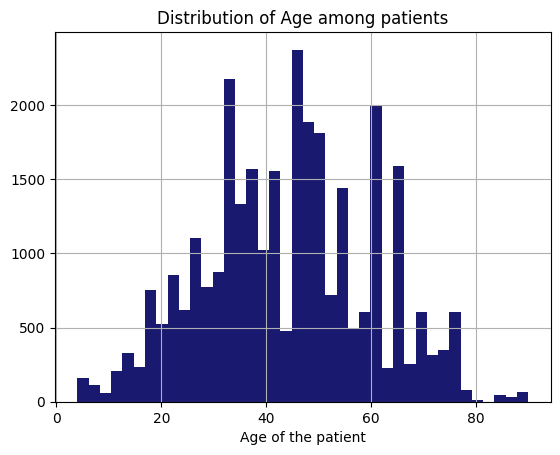

In [ ]:
patients_data['Age of the patient'].hist(bins=40, color='midnightblue')
plt.title("Distribution of Age among patients")
plt.xlabel("Age of the patient");

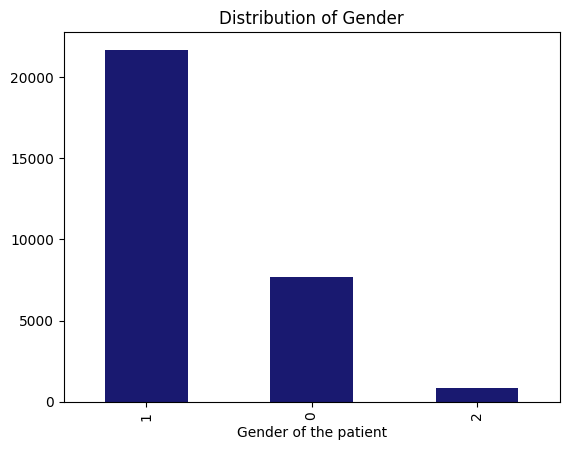

In [ ]:
patients_data['Gender of the patient'].value_counts().plot.bar(color='midnightblue')
plt.title("Distribution of Gender");

In [ ]:
# changing the column name
patients_data.rename(columns={'Result': 'Diagnosis', 'Total Protiens': 'Total Proteins'}, inplace=True)

# changing labels
patients_data['Diagnosis'] = patients_data['Diagnosis'].apply(lambda x:1 if x==1 else 0)

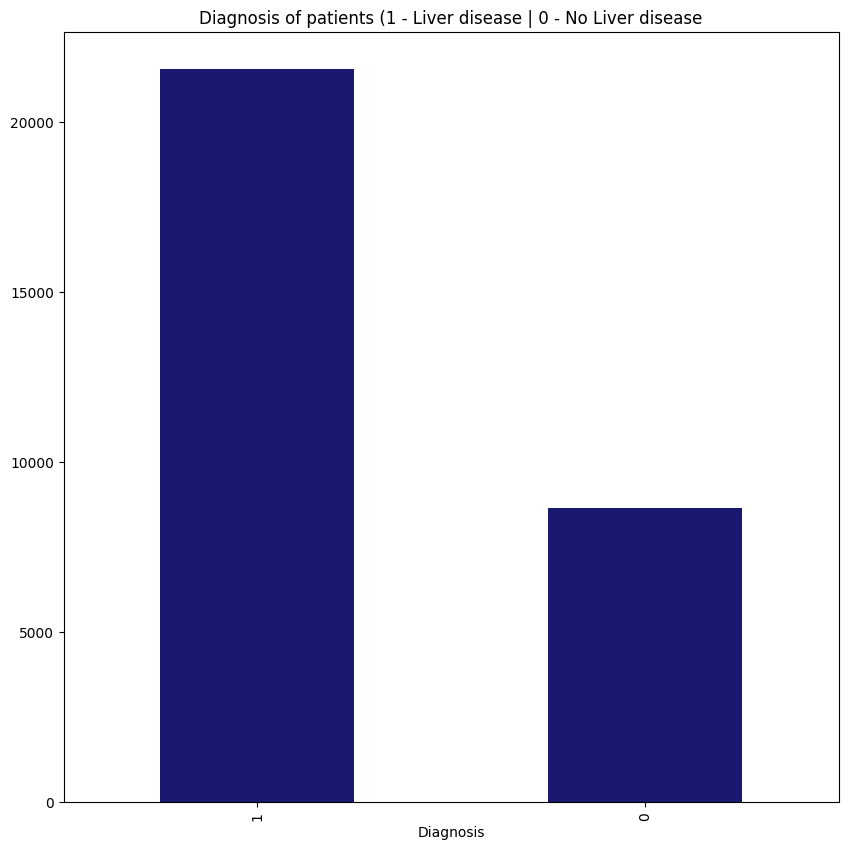

In [ ]:
patients_data['Diagnosis'].value_counts().plot.bar(color='midnightblue')
plt.title('Diagnosis of patients (1 - Liver disease | 0 - No Liver disease');

In [ ]:
patients_data.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkaline_Phosphotase                    0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Proteins                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Diagnosis                               0
dtype: int64

In [ ]:
mean_ratio = patients_data['A/G Ratio Albumin and Globulin Ratio'].mean()
mean_ratio

0.9430588546663577

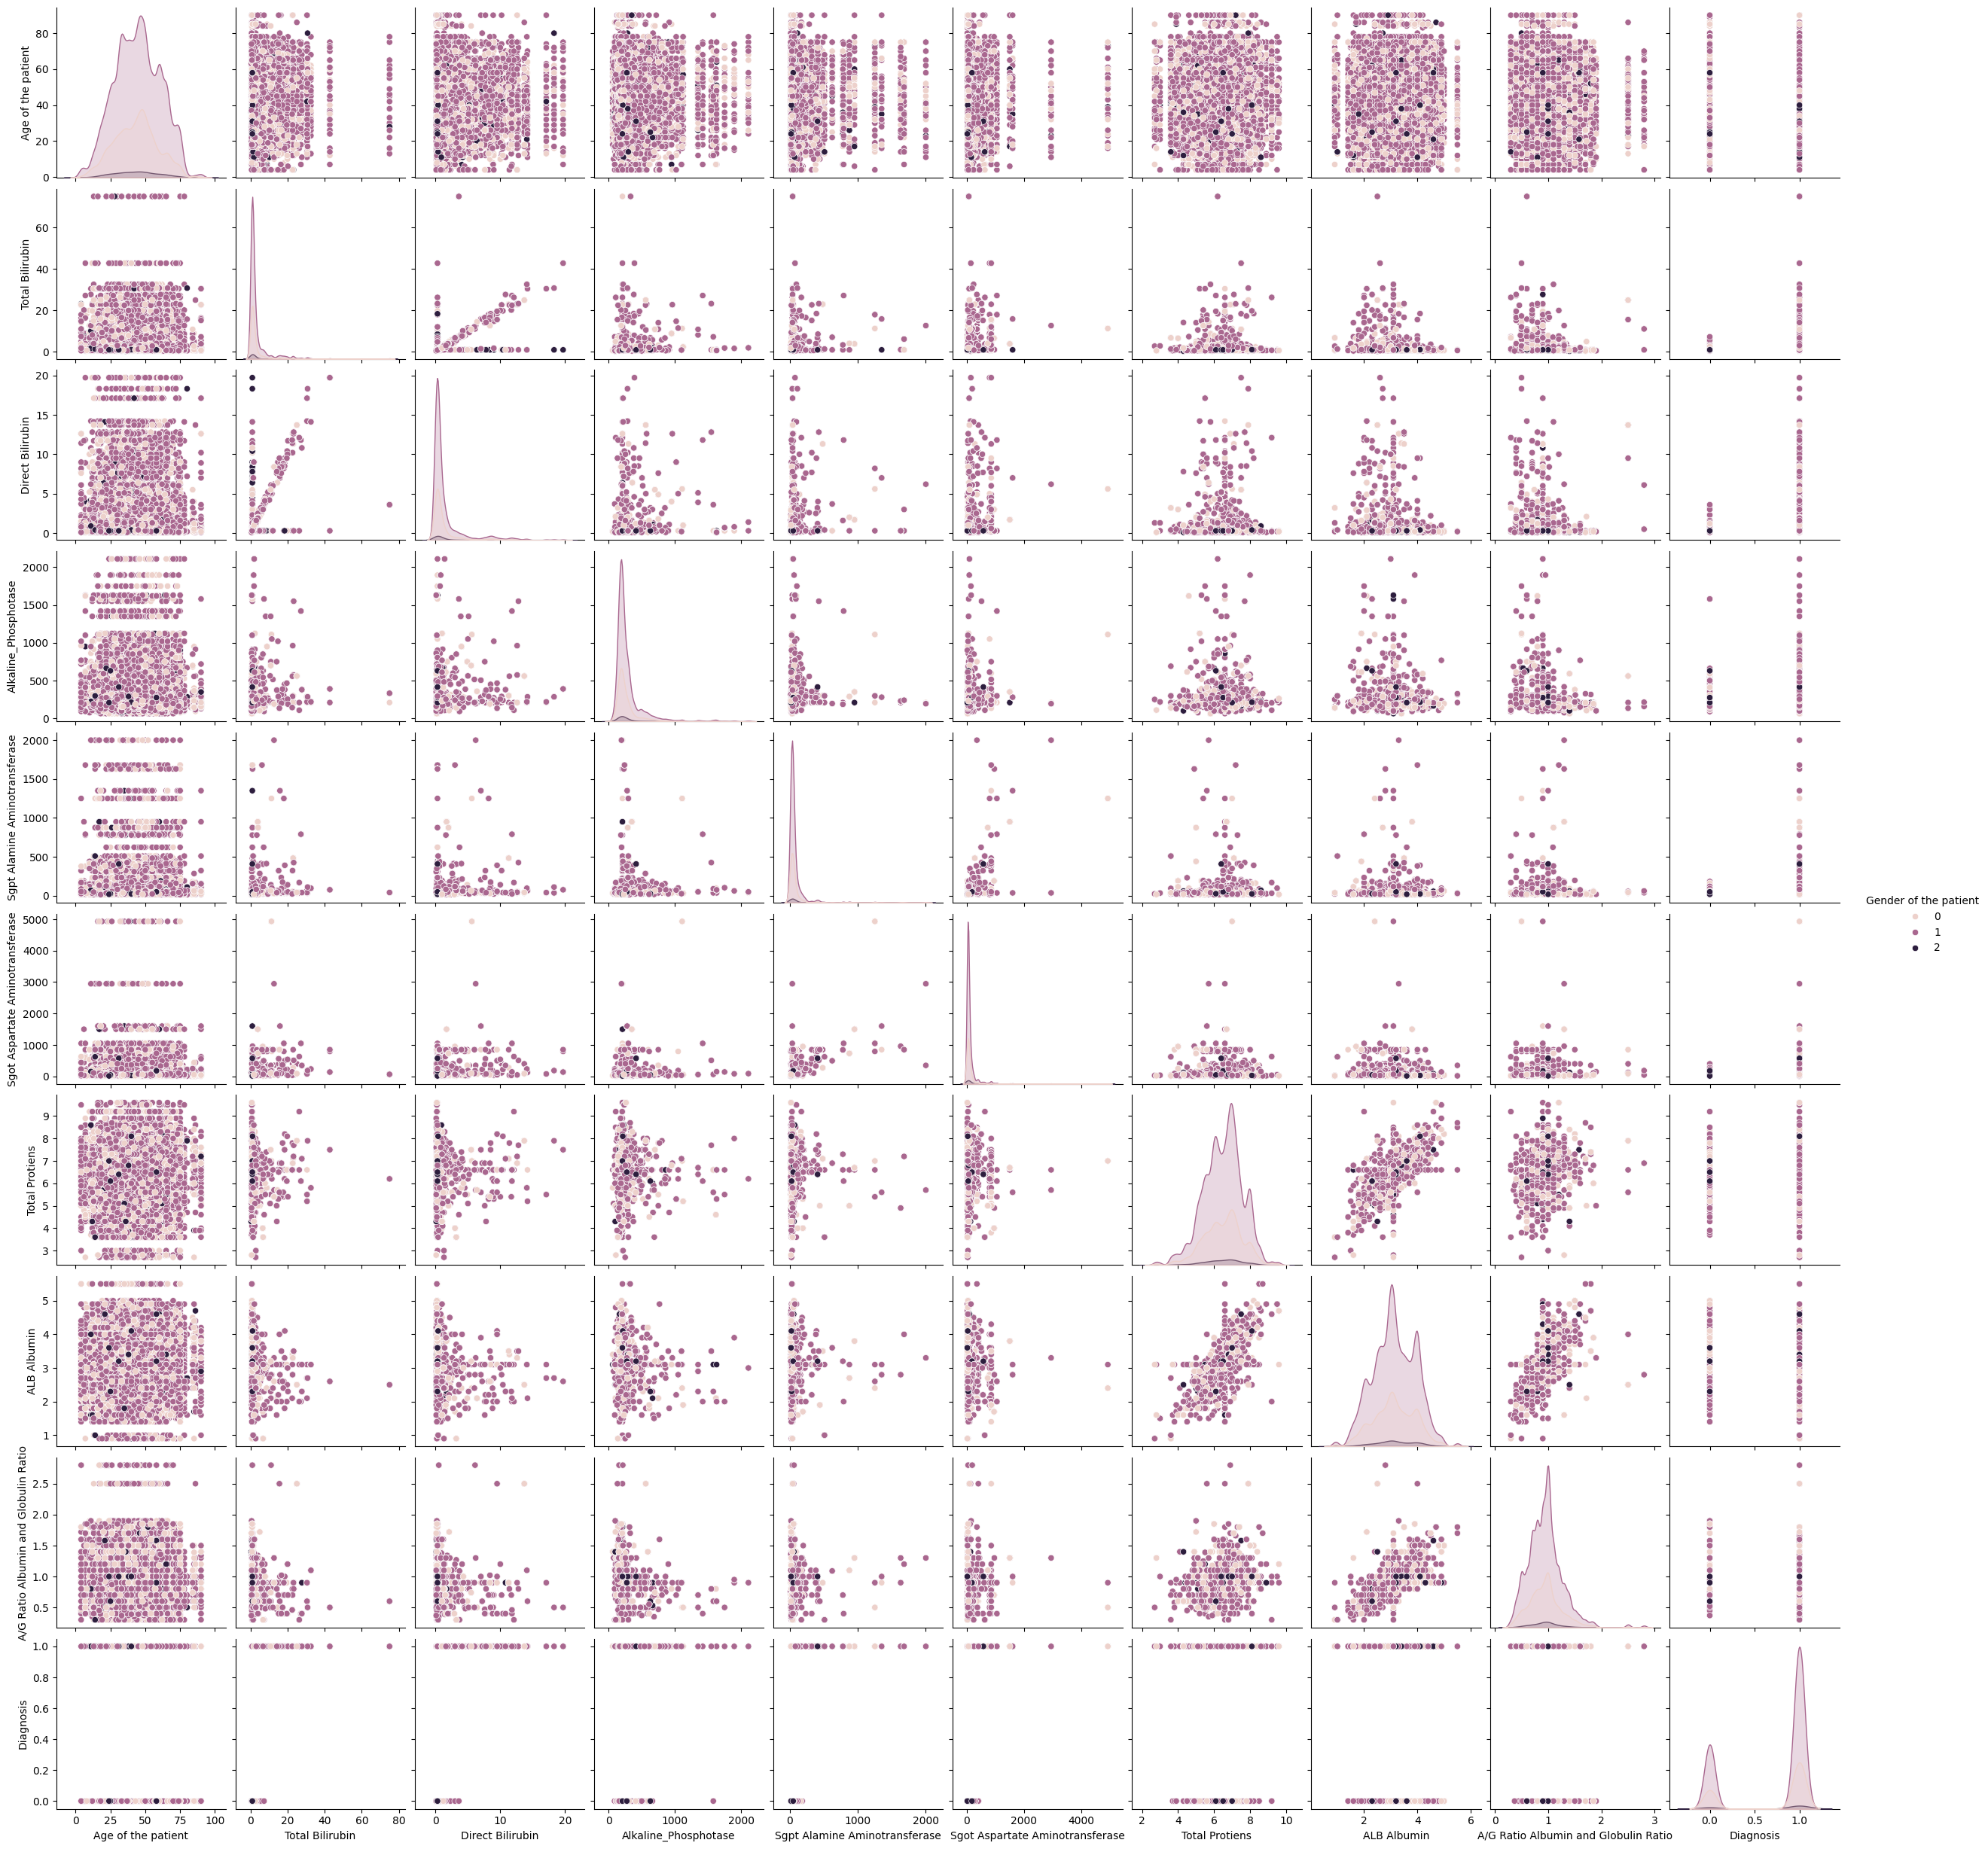

In [ ]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients_data,hue='Gender of the patient')

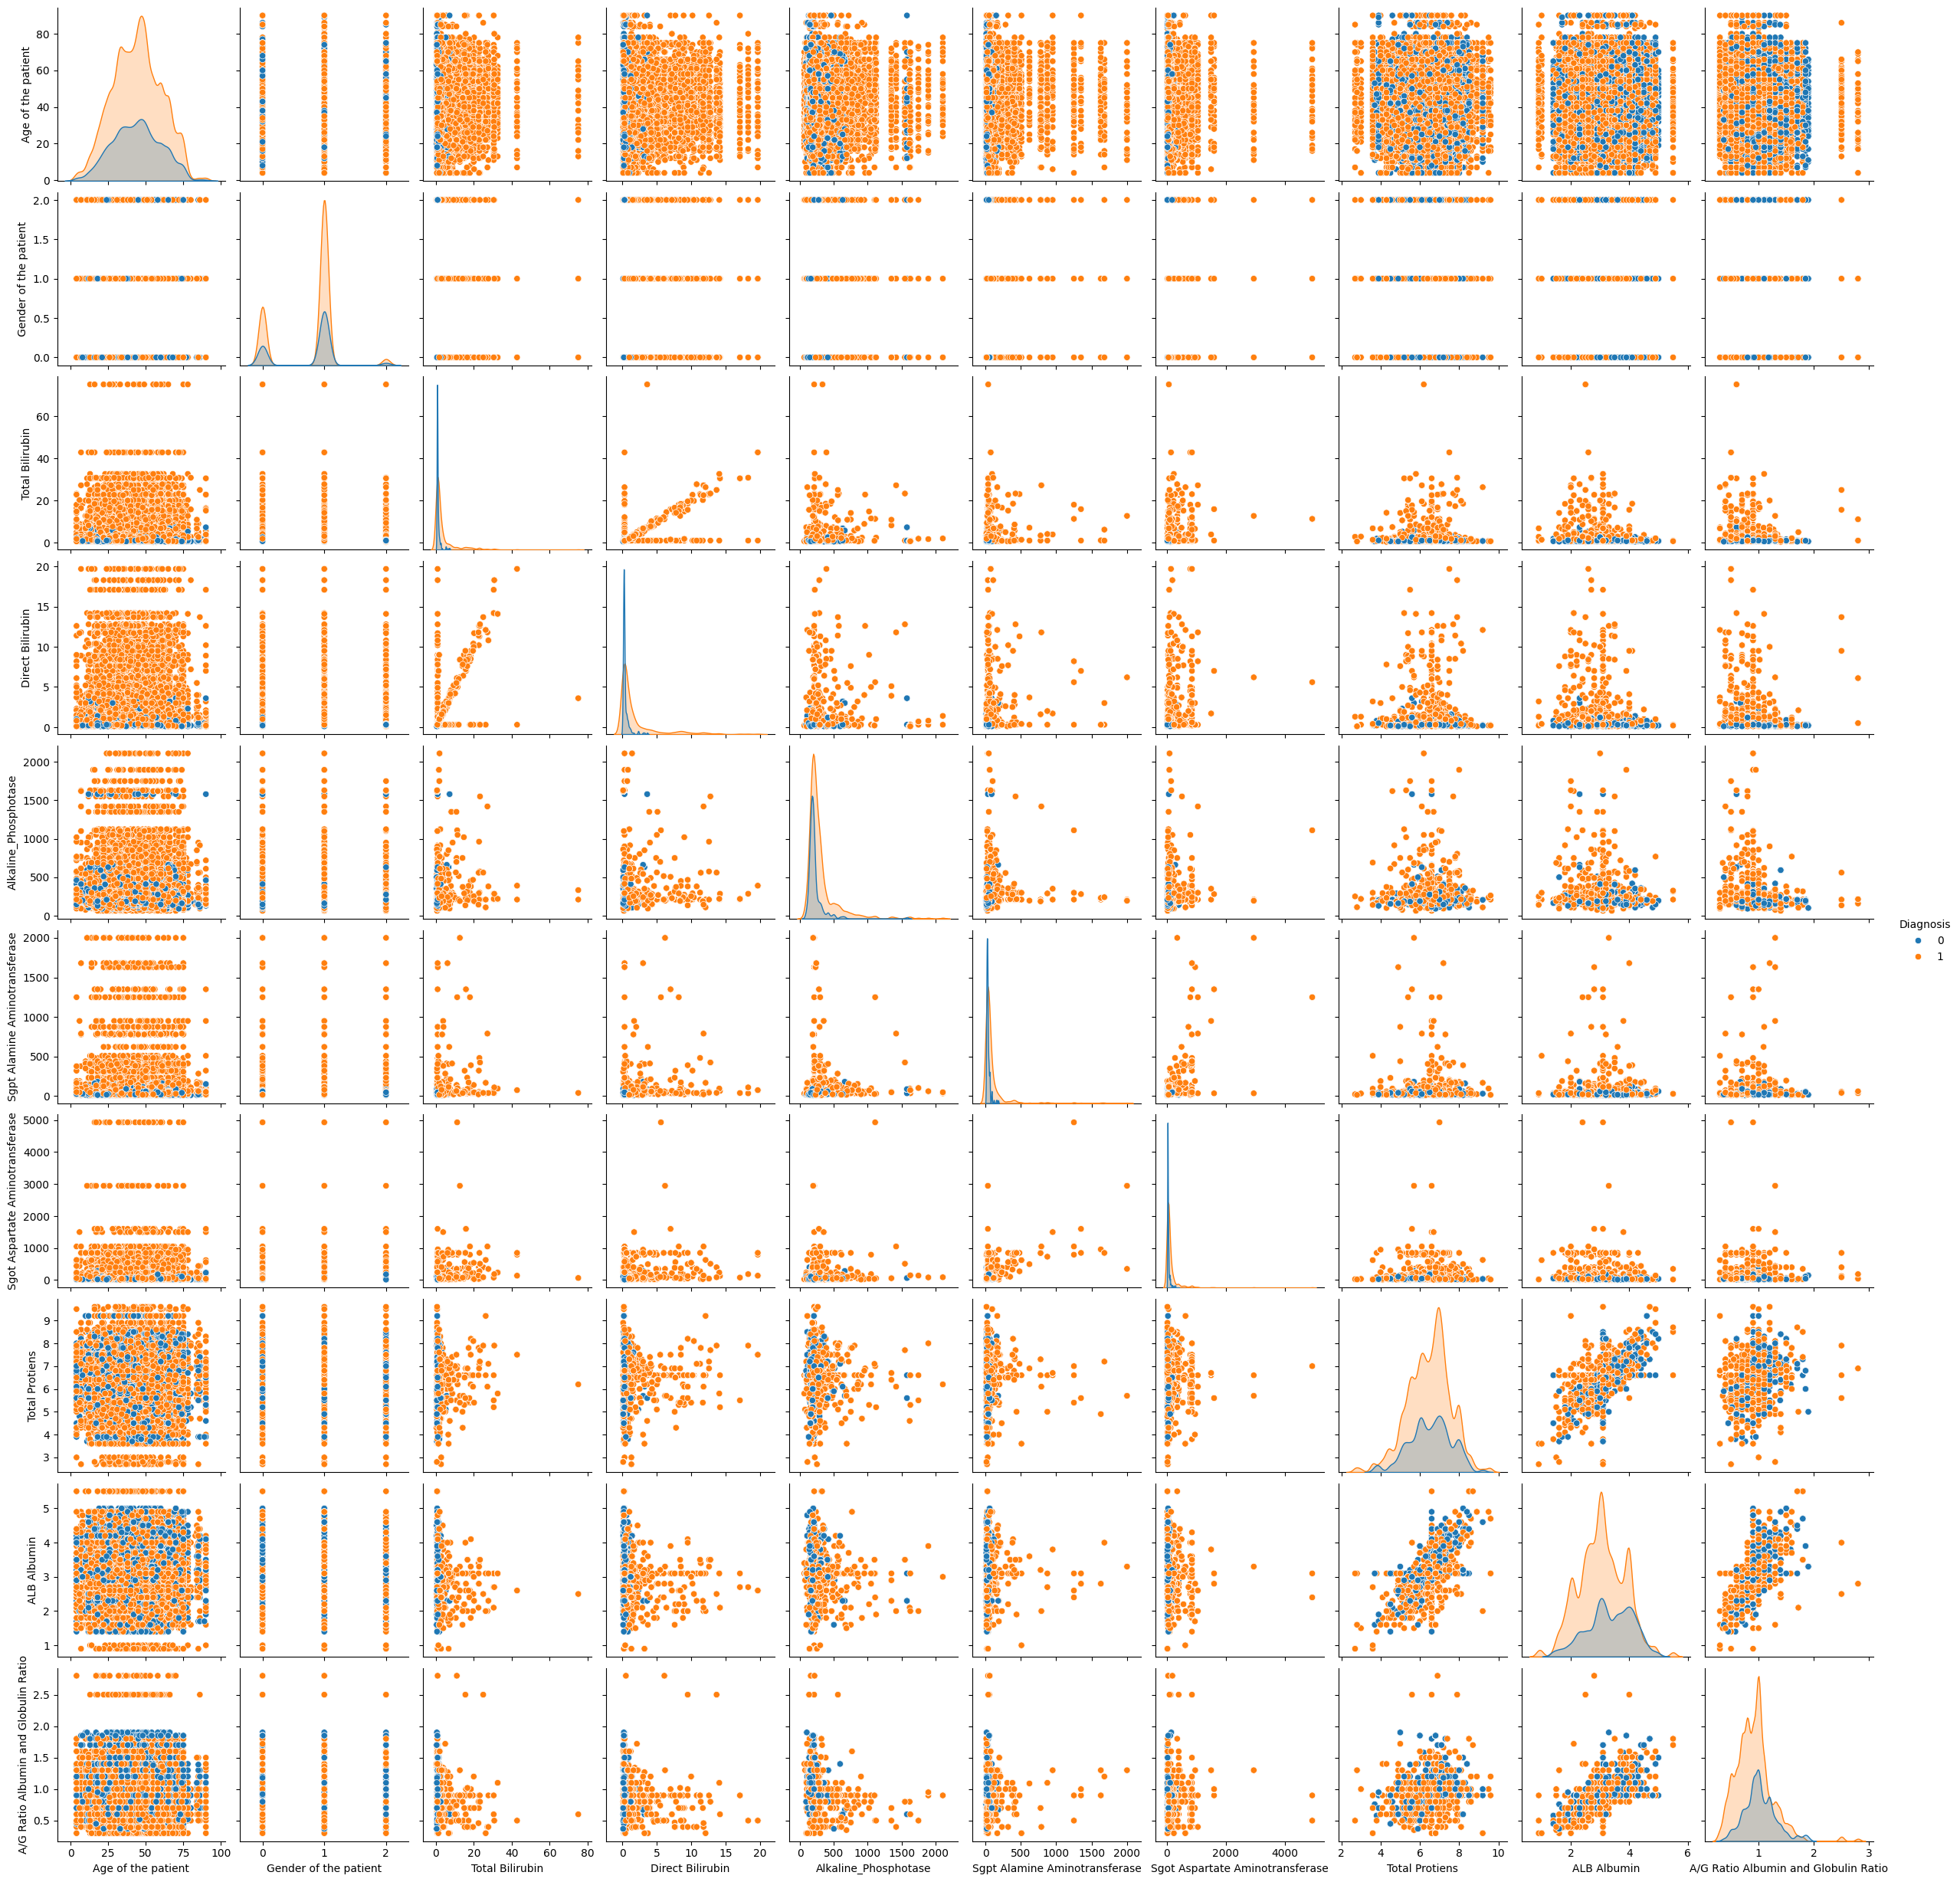

In [ ]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(patients_data,hue='Diagnosis')

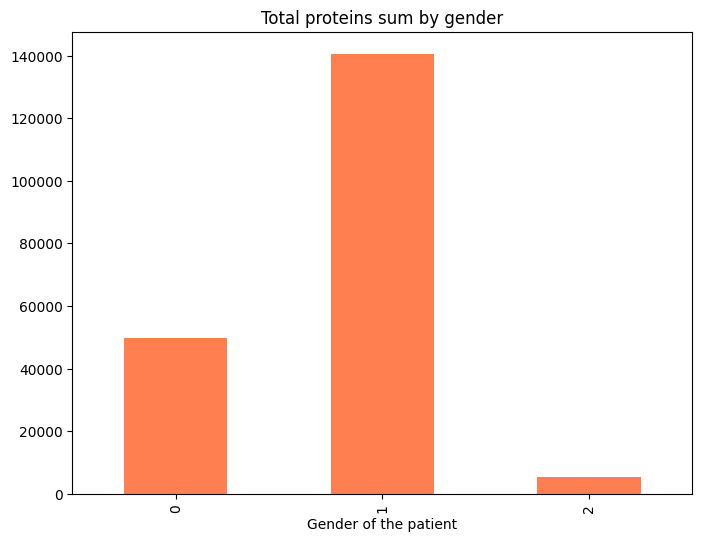

In [ ]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender of the patient').sum()["Total Proteins"].plot.bar(color='coral')
plt.title('Total proteins sum by gender');

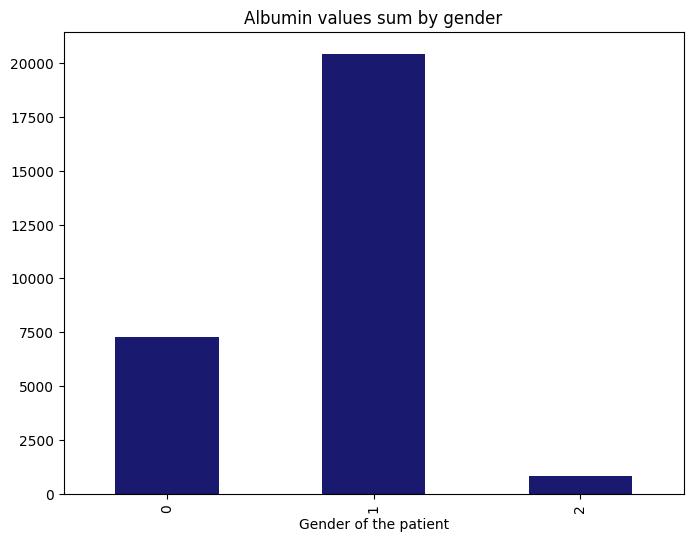

In [ ]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender of the patient').sum()['A/G Ratio Albumin and Globulin Ratio'].plot.bar(color='midnightblue')
plt.title('Albumin values sum by gender');

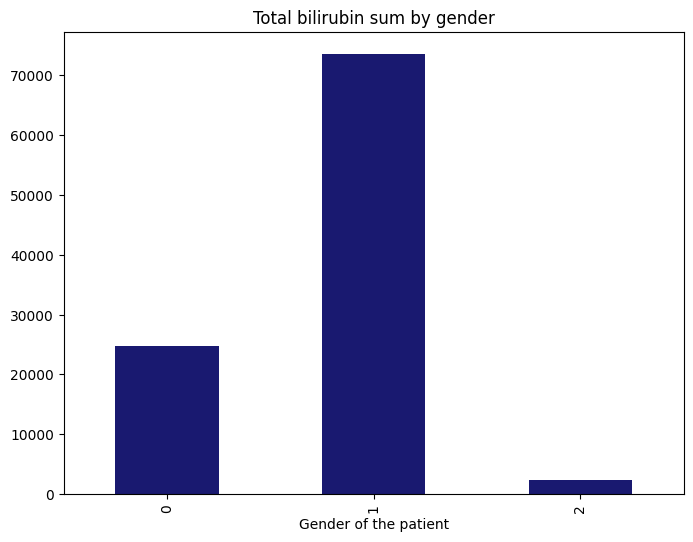

In [ ]:
plt.figure(figsize=(8,6))
patients_data.groupby('Gender of the patient').sum()['Total Bilirubin'].plot.bar(color='midnightblue')
plt.title('Total bilirubin sum by gender');

In [ ]:
patients_data['Gender of the patient'] = patients_data['Gender of the patient'].apply(lambda x:1 if x=='1' else 0)

patients_data.head()

Age of the patient  Gender of the patient  Total Bilirubin  \
0                65.0                      0              0.7   
1                62.0                      0             10.9   
2                62.0                      0              7.3   
3                58.0                      0              1.0   
4                72.0                      0              3.9   

   Direct Bilirubin  Alkaline_Phosphotase  Sgpt Alamine Aminotransferase  \
0               0.1                 187.0                           16.0   
1               5.5                 699.0                           64.0   
2               4.1                 490.0                           60.0   
3               0.4                 182.0                           14.0   
4               2.0                 195.0                           27.0   

   Sgot Aspartate Aminotransferase  Total Proteins  ALB Albumin  \
0                             18.0             6.8          3.3   
1                            100.0             7.5          3.2   
2                             68.0             7.0          3.3   
3                             20.0             6.8          3.4   
4                             59.0             7.3          2.4   

   A/G Ratio Albumin and Globulin Ratio  Diagnosis  
0                                  0.90          1  
1                                  0.74          1  
2                                  0.89          1  
3                                  1.00          1  
4                                  0.40          1

<Axes: >

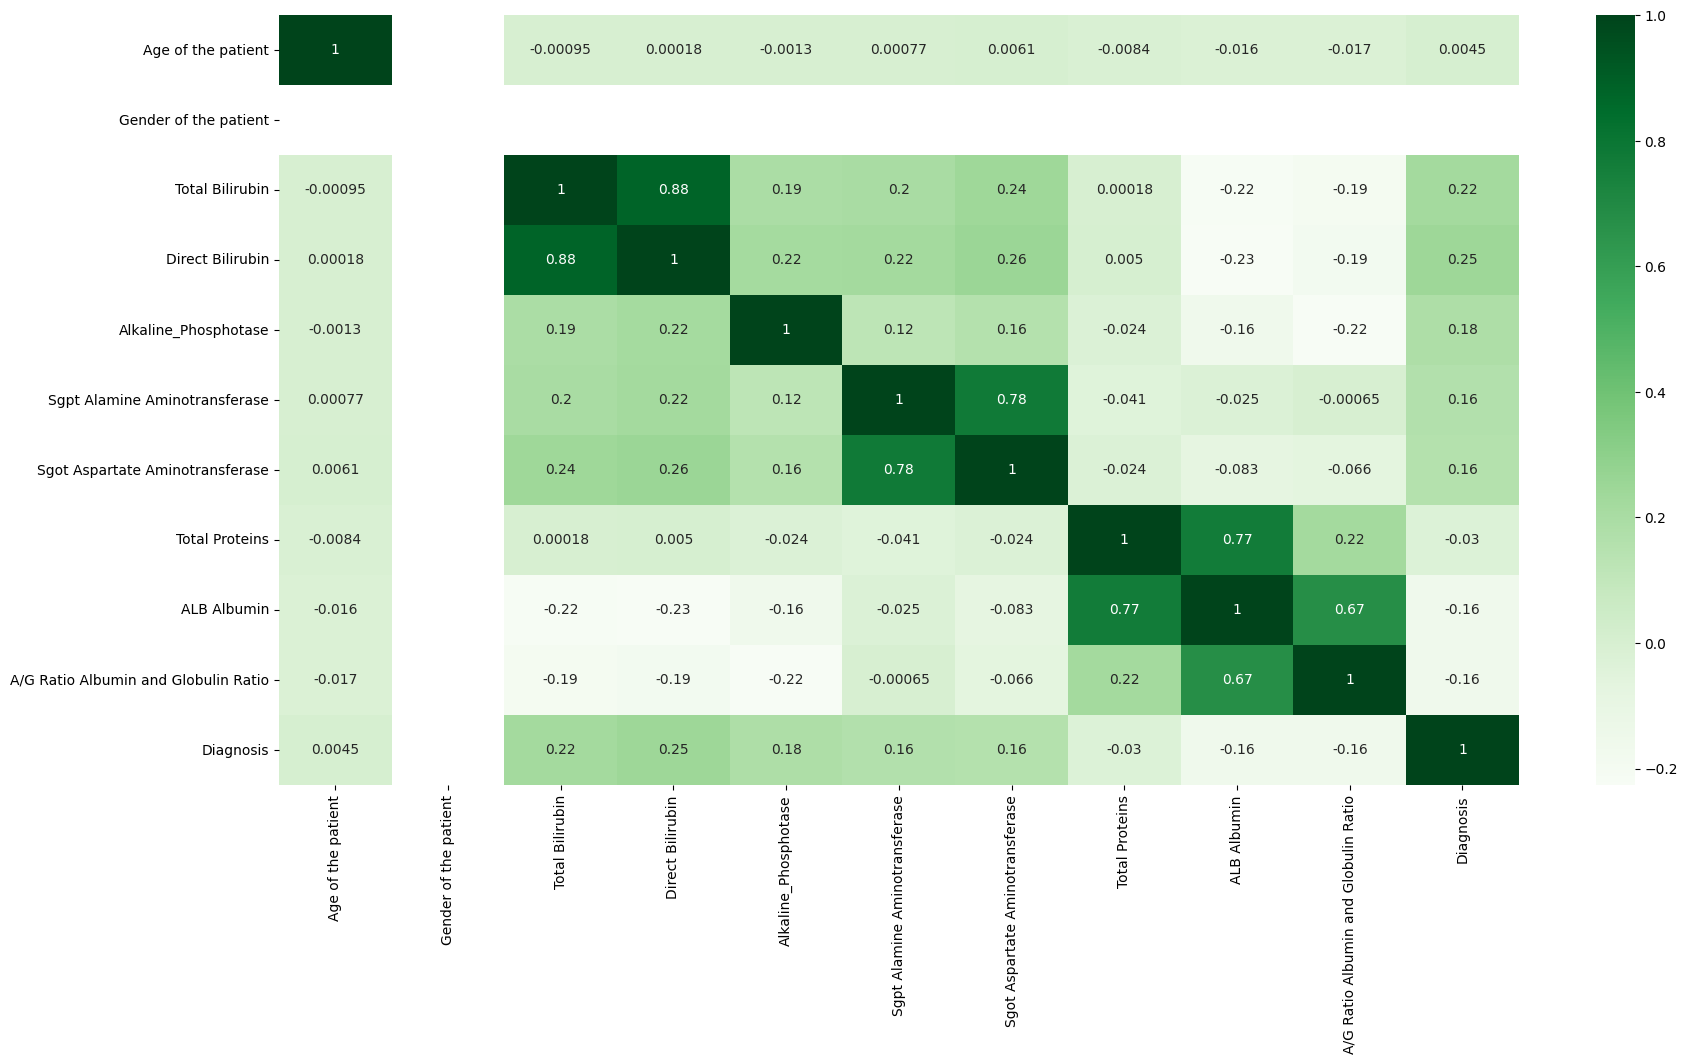

In [ ]:
corr=patients_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap="Greens",annot=True)

In [ ]:
patients_data.columns

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkaline_Phosphotase',
       'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Proteins', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio',
       'Diagnosis'],
      dtype='object')

In [ ]:
patients_data.drop("Diagnosis", axis=1).apply(lambda x: x.corr(patients_data['Diagnosis']))

Age of the patient                      0.004487
Gender of the patient                        NaN
Total Bilirubin                         0.222931
Direct Bilirubin                        0.247651
Alkaline_Phosphotase                    0.180976
Sgpt Alamine Aminotransferase           0.164598
Sgot Aspartate Aminotransferase         0.158645
Total Proteins                         -0.029870
ALB Albumin                            -0.158333
A/G Ratio Albumin and Globulin Ratio   -0.156068
dtype: float64

In [ ]:
X = patients_data.drop('Diagnosis', axis=1)
y = patients_data['Diagnosis']
from sklearn.preprocessing import StandardScaler

# Scaling the feature columns
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.719042893373029

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.14      0.22      2582
           1       0.74      0.95      0.83      6487

    accuracy                           0.72      9069
   macro avg       0.63      0.55      0.53      9069
weighted avg       0.68      0.72      0.66      9069



In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7219098026243246

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2582
           1       1.00      1.00      1.00      6487

    accuracy                           1.00      9069
   macro avg       1.00      1.00      1.00      9069
weighted avg       1.00      1.00      1.00      9069



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9986768111147867

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2582
           1       1.00      1.00      1.00      6487

    accuracy                           1.00      9069
   macro avg       1.00      1.00      1.00      9069
weighted avg       1.00      1.00      1.00      9069



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9726540963722572

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2582
           1       0.98      0.98      0.98      6487

    accuracy                           0.97      9069
   macro avg       0.97      0.97      0.97      9069
weighted avg       0.97      0.97      0.97      9069



In [ ]:
value = {'Age of the patient': 72,
        'Gender of the patient': 0,
        'Total Bilirubin': 0.6,
        'Direct Bilirubin': 0.1,
        'Alkaline_Phosphotase': 122,
        'Sgpt Alamine Aminotransferase': 22,
        'Sgot Aspartate Aminotransferase': 19,
        'Total Proteins': 8.9,
        'ALB Albumin': 4.9,
        'A/G Ratio Albumin and Globulin Ratio': 1.2}
data = pd.DataFrame([value])
data

Age of the patient  Gender of the patient  Total Bilirubin  \
0                  72                      0              0.6   

   Direct Bilirubin  Alkaline_Phosphotase  Sgpt Alamine Aminotransferase  \
0               0.1                   122                             22   

   Sgot Aspartate Aminotransferase  Total Proteins  ALB Albumin  \
0                               19             8.9          4.9   

   A/G Ratio Albumin and Globulin Ratio  
0                                   1.2

In [ ]:
svc.predict(data)[0]

0

In [ ]:
value = {'Age of the patient': 65,
        'Gender of the patient': 0,
        'Total Bilirubin': 0.7,
        'Direct Bilirubin': 0.1,
        'Alkaline_Phosphotase': 187,
        'Sgpt Alamine Aminotransferase': 16,
        'Sgot Aspartate Aminotransferase': 18,
        'Total Proteins': 6.8,
        'ALB Albumin': 3.3,
        'A/G Ratio Albumin and Globulin Ratio': 0.9

    }
data = pd.DataFrame([value])
data

Age of the patient  Gender of the patient  Total Bilirubin  \
0                  65                      0              0.7   

   Direct Bilirubin  Alkaline_Phosphotase  Sgpt Alamine Aminotransferase  \
0               0.1                   187                             16   

   Sgot Aspartate Aminotransferase  Total Proteins  ALB Albumin  \
0                               18             6.8          3.3   

   A/G Ratio Albumin and Globulin Ratio  
0                                   0.9

In [ ]:
svc.predict(data)[0]

1